In [63]:
import numpy as np
import matplotlib.pyplot as plt

# possible config options
cfgs = {
    "dt":[0,1,2], # choices for the integration step
    "solver":["eu1", "eu2", "ext"], # choices for the solver
      }

cfg = {
    "dt":0,
    "solver":"ext",
}

We will be solving a second order linear differential equation:

u'' + u = 0

To study the properties of the numeric solutions, we can use an integration step of 0.2 (five times less than the stability step), 0.5 or 1.
Additionally, we can initialize the second initial condition using numeric integration (Euler scheme with one or two steps) or the exact solution.

In [64]:
T = 20

if cfg["dt"] == 0:
    dt = 0.2 # five times less than the stability step
elif cfg["dt"] == 1:
    dt = 0.5 # two times less than the stability step
else:
    dt = 1 # stability step
    
time = np.arange(0,T,dt)
good_time = np.arange(0,T,0.005)
N = time.size

In our solution we will use a substitution:
    
v = u'

v' = -u

y = u + iv

y is the complex function leading to the equation:
y' = -i*y

In [72]:
u = np.zeros(N) # d2u/dx2 + u = 0
v = np.zeros(N) # v = du/dx, dv/dx = -u
y = u + 1j*v    # complex function leading to dw/dx = -i*w

In [73]:
y[0] = (50+32+1)/30 # initial condition

In [74]:
if cfg["solver"] == "eu1":
    y[1] = y[0] - 1j*dt*y[0] # one Euler scheme step
elif cfg["solver"] == "ext":
    y[1] = y[0]*np.exp(-1j*time[1]) # exact solution
else:
    for i in range(0,2):               # two Euler scheme steps
        y[i+1] = y[i]-1j*0.5*dt*y[i]
    y[1] = y[2]
    y[2] = 0

In [75]:
# perform integration
for i in range(1,N-1):
    y[i+1] = y[i-1] - 1j*y[i]*2*dt

In [76]:
u = y.real

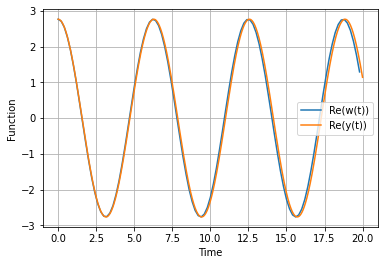

In [77]:
_, ax = plt.subplots()
plt.plot(time, u, label = 'Re(w(t))')
plt.plot(good_time,y[0].real*np.cos(good_time), label = 'Re(y(t))')
ax.set_xlabel('Time')
ax.set_ylabel('Function')
ax.grid()
plt.legend()

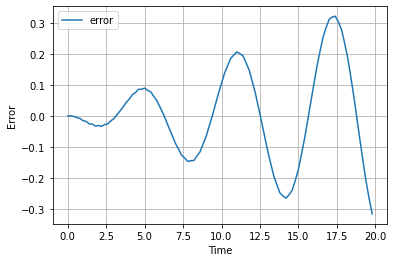

In [78]:
_, ax = plt.subplots()
plt.plot(time,u - y[0].real*np.cos(time), label = "error")
ax.set_xlabel('Time')
ax.set_ylabel('Error')
ax.grid()
plt.legend()

It can be seen that with the chosen parameters the error rate grows, however, stays relatively low. 